# <center>  Classification de patients souffrant d’un cancer. </center>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
# Seaborn for plotting and styling
import seaborn as sns

## Introduction 

Réaliser cette classification de patients porteurs de cellules cancéreuses bénignes ou malignes, nous allons utiliser un algorithme kNN.
Le classificateur kNN ou k-Nearest Neighbours est un algorithme d'apprentissage automatique très simple et facile à comprendre. Le but de ce brief est de mettre en place un classificateur k Nearest Neighbours pour classer les patients souffrant de cancer du sein.


##  Exploration des données 

In [3]:
df_01= pd.read_csv("Breast_Cancer_03.csv") # importation des données sous forme d'un tableau pandas
print(len(df_01))
df_01.info()
df_01.head(10)
df_01.describe()

569
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se          

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
### verify si Null or Nan in dataframe
print(df_01.isnull().values.any())
#### l'index des lignes
print(df_01.index)
#### l'index des colonnes
print(df_01.columns)

False
RangeIndex(start=0, stop=569, step=1)
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## Les variables de décison et la variable cible

In [5]:
from sklearn.preprocessing import LabelEncoder
#features_00 = features_00.astype('float64')
df_01['diagnosis']= LabelEncoder().fit_transform(df_01['diagnosis'])
#### l'index des colonnes
print(df_01.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [6]:
features_00=df_01.loc[:,'radius_mean':'fractal_dimension_worst'] #### les inputs, les entrées
targets_00=df_01.loc[:,'diagnosis'] #### les targets  
from collections import Counter
from sklearn.preprocessing import LabelEncoder
#features_00 = features_00.astype('float64')
#targets_00= LabelEncoder().fit_transform(targets_00.astype('str'))
print(features_00.shape)
print(targets_00.shape)

print(Counter(targets_00))

(569, 30)
(569,)
Counter({0: 357, 1: 212})


In [7]:
#On choisit de garde 15% de data pour la phase de prediction aprés l'ajustement du modèle finale 
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.15, random_state=1)
for train_ix, test_ix in rs.split(features_00):
        
    features, features_pr = features_00.iloc[train_ix], features_00.iloc[test_ix]
    targets, targets_pr = targets_00.iloc[train_ix], targets_00.iloc[test_ix]

print(features.shape)
print(targets.shape)
print(features_pr.shape)
print(targets_pr.shape)

(483, 30)
(483,)
(86, 30)
(86,)


## Visualisation des données

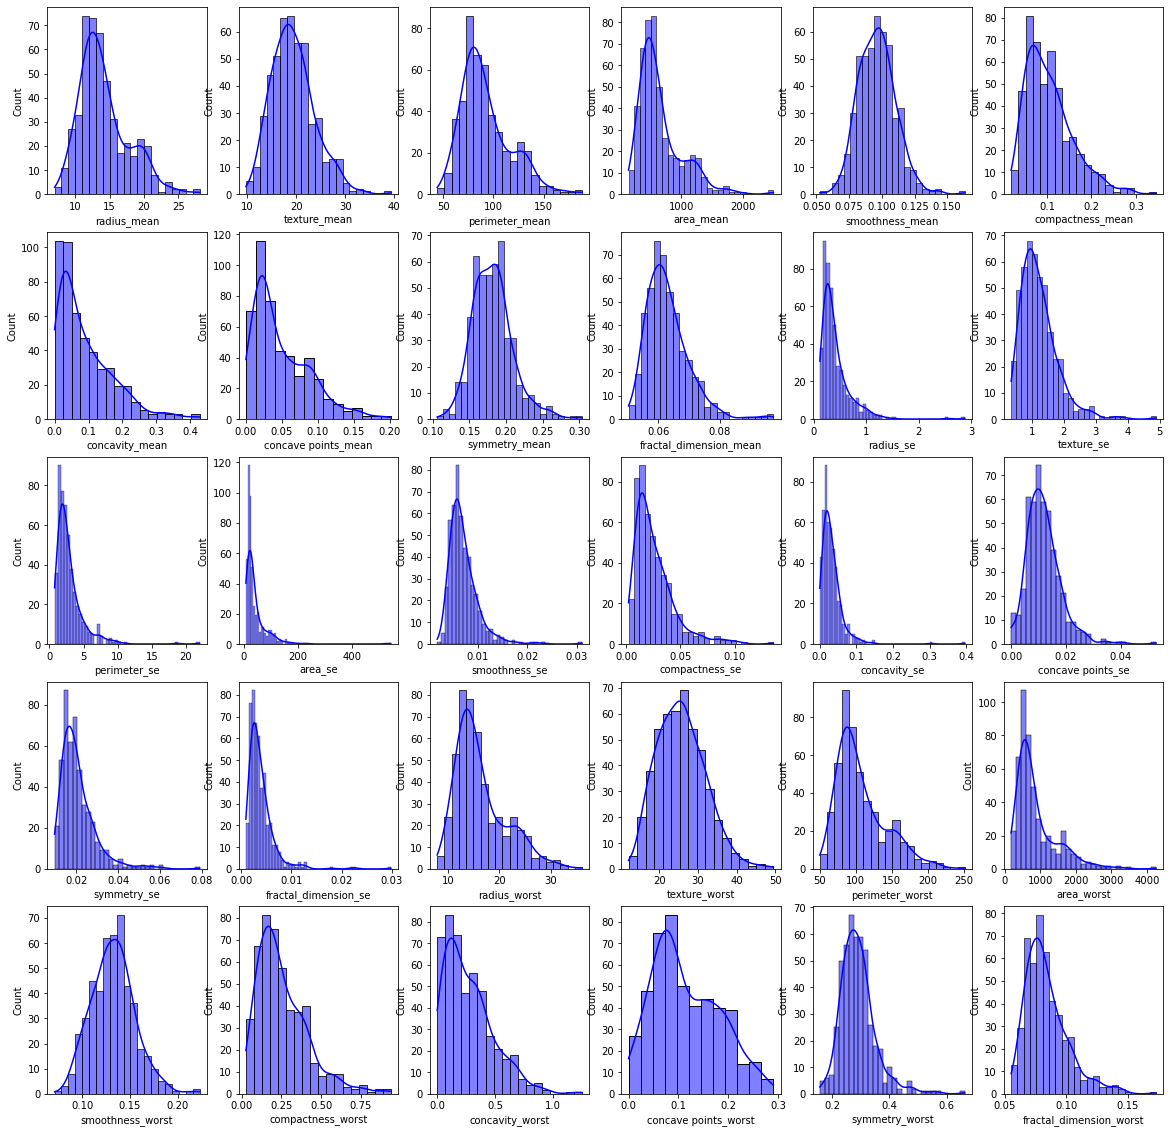

In [8]:


# l'histogramme de nos variables (features)
f, axes = plt.subplots(5, 6, figsize=(20, 20))
for ax, feature in zip(axes.flat, features.columns):
    sns.histplot(features[feature] , color="b", ax=ax,kde=True)


On remarque qu'il ya des variables qui n'ont pas des distributions normales. C'est trés probable qu'une standarisation ne soient pas trés adéquate pour ses variables.

<AxesSubplot:>

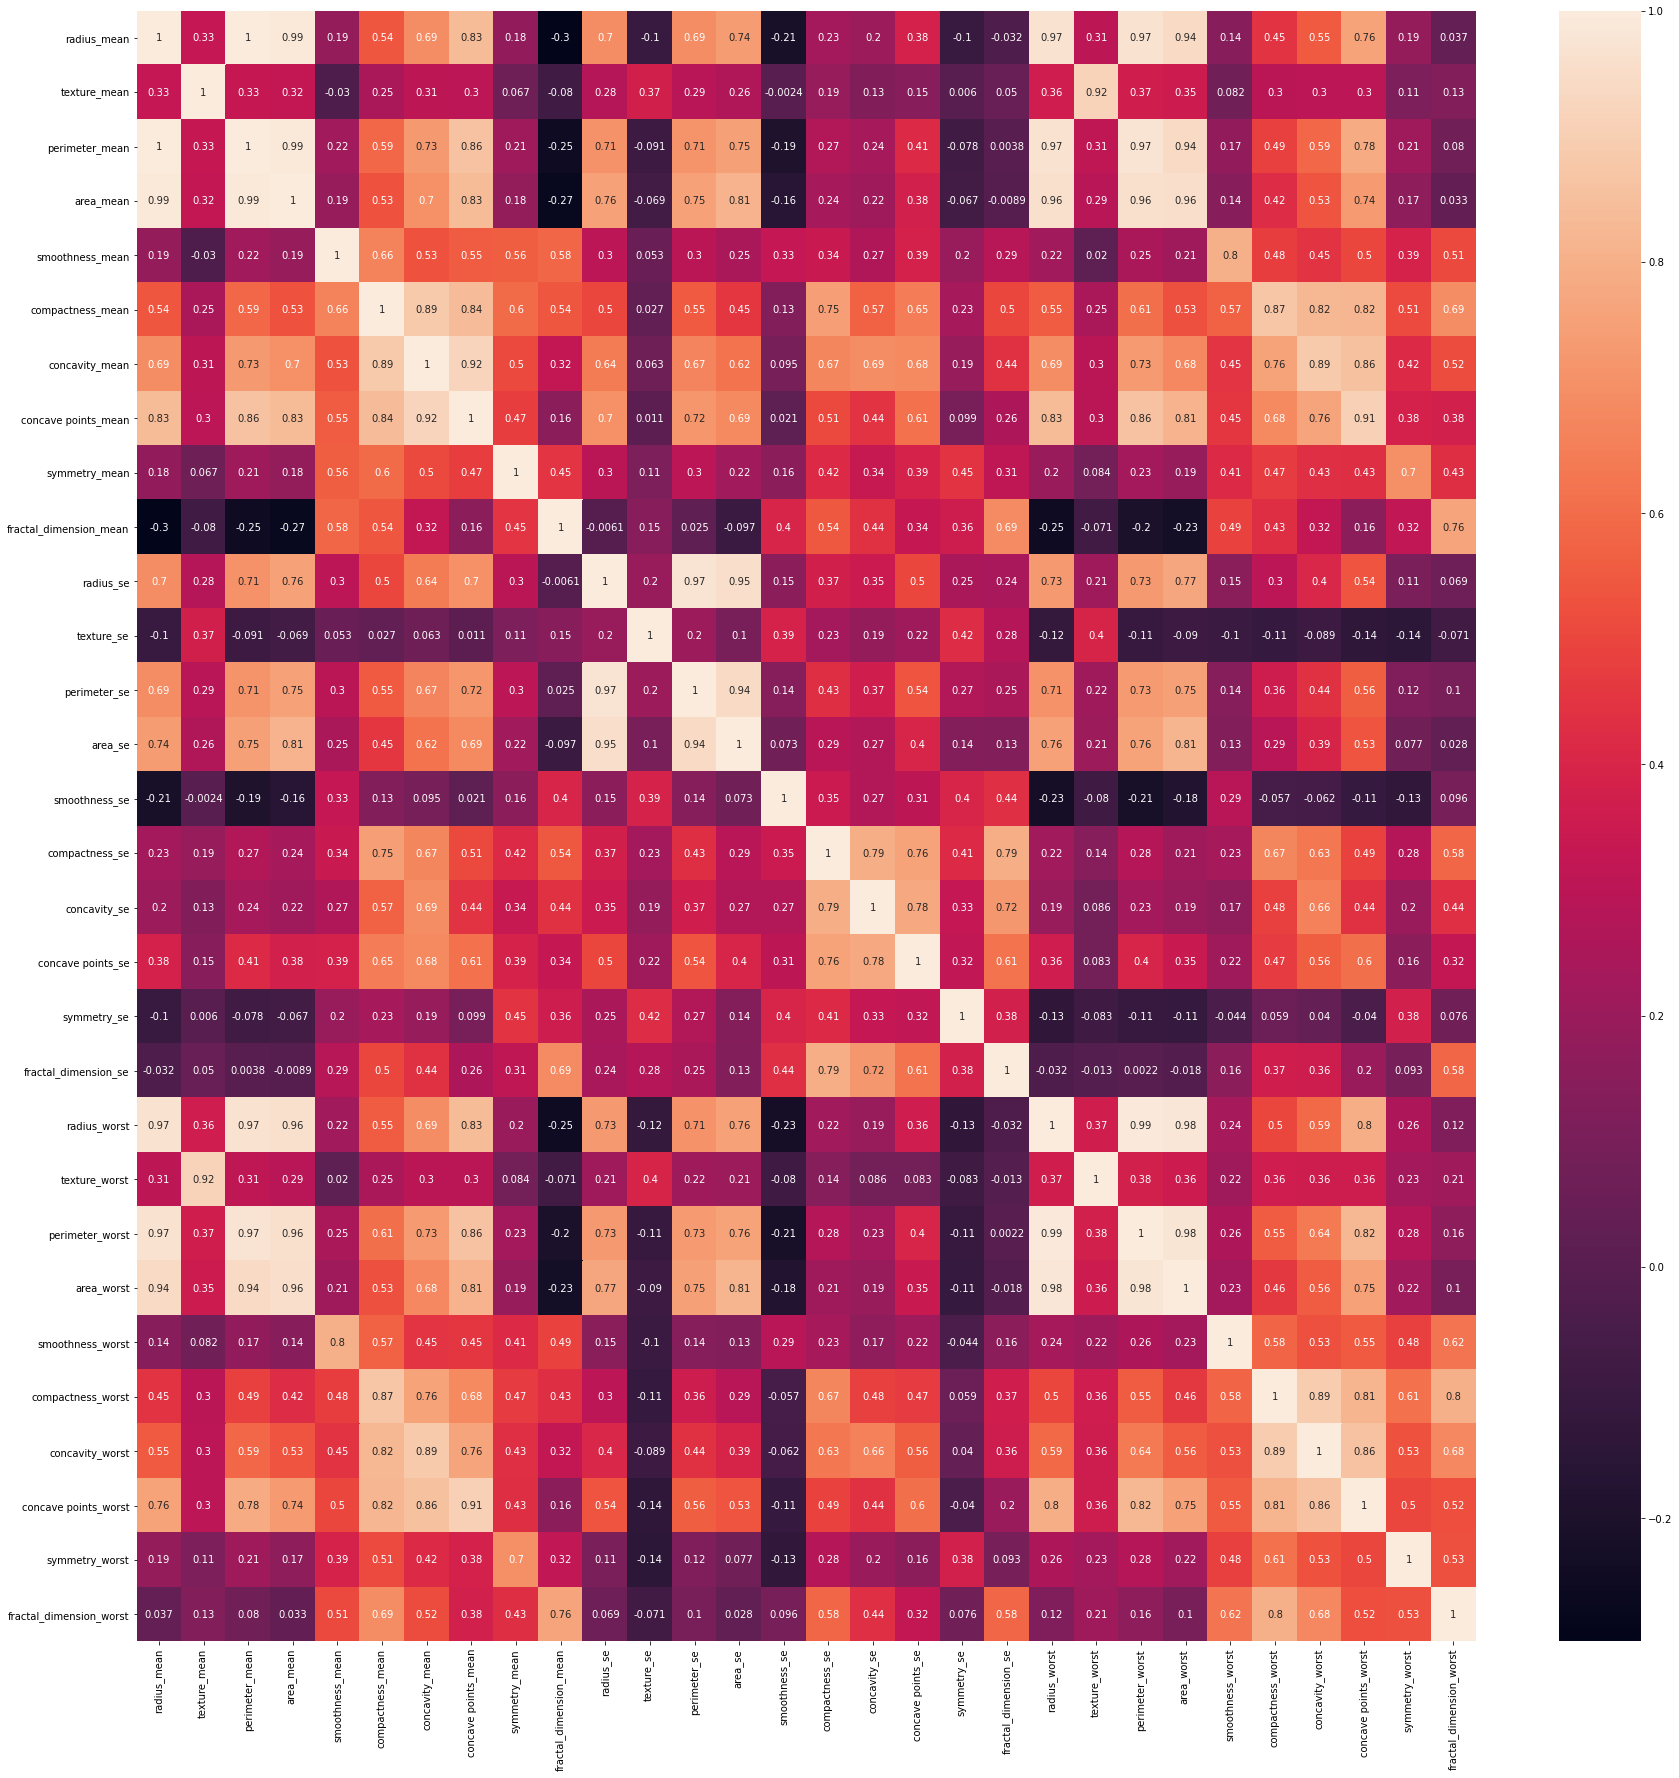

In [9]:
plt.subplots(figsize=(30,30))
sns.heatmap(features.corr(), annot=True)

On rematque qu'il ya beaucoup des features qui sont correlées. Il vaut mieux chercher à éliminer udes features correlées pour améliorer la convergence de l'algorithme d'apprentissage.

## Le processus de sélection de modèle finale

In [ ]:
## copie des données 
import copy

XX=copy.copy(features)
YY=copy.copy(targets)



print(XX.shape)
print(YY.shape)
print(Counter(YY))

Pour le choix du modèle final à entrainer (les paramètres de mon modèle). On choisit d'expliciter un grid search sur le n des voisins à reglér ainsi que sur la méthode de calcul de la distance. 
La validation de cette grid search sera effectué en explicitant deux cross validations une extérieure (manuelle) et l'autre interne automatique. Pour garantir que le modèle à entrainer et donc à valider ne soit bruité par le connaissance des données du test set, on prend le soin d'inclure le processus de scaling dans la cross validation interne, via le Pipeline Scikit-learn. 

In [12]:
def run_pipe(pipe):
    cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
    outer_results = list()
    for train_ix, test_ix in cv_outer.split(XX):
           # split data
       # X_train, X_test = XX[train_ix,:], XX[test_ix,:]
       # y_train, y_test = YY[train_ix], YY[test_ix]
        
        X_train, X_test = XX.iloc[train_ix], XX.iloc[test_ix]
        y_train, y_test = YY.iloc[train_ix], YY.iloc[test_ix]
        
        #train = df.iloc[result[0]]
        #test =  df.iloc[result[1]]
    # configure the cross-validation procedure
        cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
        # define space search
        space = dict()
        space['KNN__n_neighbors'] = list(range(1,21))
        space['KNN__weights'] = ['uniform', 'distance']
        # define search
        search = GridSearchCV(pipe, space, scoring='accuracy', cv=cv_inner, refit=True)
        # execute search
        result = search.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
        best_model = result.best_estimator_
    # evaluate model on the hold out dataset
        yhat = best_model.predict(X_test)
    # evaluate the model
        acc = accuracy_score(y_test, yhat)
    # store the result
        outer_results.append(acc)
    # report progress
    
        print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
    print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))


In [12]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
# create dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [14]:


pipe0 = Pipeline([('KNN', KNeighborsClassifier())])
pipe1 = Pipeline([
    ('trans-MinMax', MinMaxScaler()),
    ('KNN', KNeighborsClassifier()),
])
pipe2 = Pipeline([
    ('trans_normlz', Normalizer()),
    ('KNN', KNeighborsClassifier()),
])

pipe3 = Pipeline([
    ('trans_stand', StandardScaler()),
    ('KNN', KNeighborsClassifier()),
])
pipe4 = Pipeline([
    ('trans_stand-MM', StandardScaler()),('trans-MinMax', MinMaxScaler()),
    ('KNN', KNeighborsClassifier()),
])
pipe5 = Pipeline([
    ('trans_stand-N', StandardScaler()),('trans_normlz', Normalizer()),
    ('KNN', KNeighborsClassifier()),
])

pipe6 = Pipeline([
    ('trans_MM-N', MinMaxScaler()),('trans_normlz', Normalizer()),
    ('KNN', KNeighborsClassifier()),
])



On défint plusieurs piplines à tester. Ces piplines se diffèrent par la méthode de scaling.

Les résultats d'exécusion de chaque Pipline sont données dans la suite.

In [17]:
run_pipe(pipe0)

>acc=0.980, est=0.931, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'distance'}
>acc=1.000, est=0.928, cfg={'KNN__n_neighbors': 17, 'KNN__weights': 'uniform'}
>acc=0.898, est=0.938, cfg={'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
>acc=0.917, est=0.936, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.875, est=0.942, cfg={'KNN__n_neighbors': 16, 'KNN__weights': 'distance'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.854, est=0.943, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.938, est=0.931, cfg={'KNN__n_neighbors': 15, 'KNN__weights': 'uniform'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 17, 'KNN__weights': 'uniform'}
Accuracy: 0.921 (0.044)


In [18]:
run_pipe(pipe1)

>acc=0.980, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.980, est=0.975, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.972, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.975, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.979, est=0.982, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.938, est=0.973, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.979, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.938, est=0.979, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.958, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Accuracy: 0.971 (0.019)


In [19]:
run_pipe(pipe2)

>acc=0.939, est=0.928, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.918, est=0.933, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.918, est=0.931, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.917, est=0.931, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.938, est=0.929, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'distance'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 13, 'KNN__weights': 'distance'}
>acc=0.938, est=0.931, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.958, est=0.929, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}
Accuracy: 0.921 (0.026)


In [20]:
run_pipe(pipe3)

>acc=1.000, est=0.970, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.959, est=0.979, cfg={'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.972, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.972, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.958, est=0.975, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.979, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.917, est=0.968, cfg={'KNN__n_neighbors': 13, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.972, cfg={'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.972, cfg={'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
>acc=0.958, est=0.975, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Accuracy: 0.967 (0.025)


In [21]:
run_pipe(pipe4)

>acc=0.980, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.980, est=0.975, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.972, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.975, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.979, est=0.982, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.938, est=0.973, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.979, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.938, est=0.979, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.958, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Accuracy: 0.971 (0.019)


In [22]:
run_pipe(pipe5)

>acc=0.959, est=0.968, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=0.939, est=0.972, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=1.000, est=0.965, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.965, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.958, est=0.968, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.968, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.938, est=0.973, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.970, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.917, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.968, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'distance'}
Accuracy: 0.965 (0.026)


In [23]:
run_pipe(pipe6)

>acc=0.918, est=0.933, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}
>acc=0.898, est=0.935, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.878, est=0.928, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=0.958, est=0.931, cfg={'KNN__n_neighbors': 16, 'KNN__weights': 'uniform'}
>acc=0.896, est=0.924, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.929, cfg={'KNN__n_neighbors': 16, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.922, cfg={'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
>acc=0.875, est=0.940, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
>acc=0.896, est=0.920, cfg={'KNN__n_neighbors': 13, 'KNN__weights': 'distance'}
>acc=0.979, est=0.926, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
Accuracy: 0.921 (0.038)


On remarque que la méthode de Minmax scaler performe mieux que StandarScaler. Cela peut etre dis au fait que certaines variables n'ont pas une distribution normale.

In [13]:
## Pour éviter les problèmes numériques de convergence de l'algorithme d'apprentissage, on se base sur une sélection des variables ayant un nombre condition de la matrice de corrélation inférieure ou égale à 100.

import numpy as np
def condition_number(corr):# corr: correlation matrix
    eigValues,eigVectors = np.linalg.eig(corr) 
    return abs(max(eigValues)/min(eigValues))
 # greadily kick out the worst feature
def eliminate_multicol(X, threshold = 100):#weak corr threshold
    corr = np.corrcoef(X.T) # get corr matrix
    if (condition_number(corr) < threshold or X.shape[1]<=1): 
        return X  
    # find the feature with highest corr coef(lower triangle)
    mostCorrelated = np.argmax([max(corr[i+1:,i]) for i in range(X.shape[1]-1)] )
    choose = [True]*X.shape[1]
    choose[mostCorrelated] = False # kick that feature out
    return eliminate_multicol(X[:,choose])
res=eliminate_multicol(features.to_numpy(), threshold = 100)
print(res.shape)

(483, 13)


In [ ]:
Le nombre de variables recommandé est 13 parmi 30.

In [ ]:
on définit nos Piplines en incluant différents méthodes de réduction des variables tels que PCA, et TruncatedSVD. 

In [24]:


from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
pipe7 = Pipeline([('pca', PCA(n_components=13)),('KNN', KNeighborsClassifier())])
pipe8 = Pipeline([
    ('trans-MinMax', MinMaxScaler()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])
pipe9 = Pipeline([
    ('trans_normlz', Normalizer()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])

pipe10 = Pipeline([
    ('trans_stand', StandardScaler()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])
pipe11 = Pipeline([
    ('trans_stand-MM', StandardScaler()),('trans-MinMax', MinMaxScaler()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])
pipe12 = Pipeline([
    ('trans_stand-N', StandardScaler()),('trans_normlz', Normalizer()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])

pipe13 = Pipeline([
    ('trans_MM-N', MinMaxScaler()),('trans_normlz', Normalizer()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier()),
])

In [ ]:
Les résultats de simulation est la suivante

In [25]:
run_pipe(pipe7)

>acc=0.980, est=0.931, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'distance'}
>acc=1.000, est=0.928, cfg={'KNN__n_neighbors': 17, 'KNN__weights': 'uniform'}
>acc=0.898, est=0.938, cfg={'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
>acc=0.917, est=0.936, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.875, est=0.942, cfg={'KNN__n_neighbors': 16, 'KNN__weights': 'distance'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.854, est=0.943, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.938, est=0.931, cfg={'KNN__n_neighbors': 15, 'KNN__weights': 'uniform'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 2, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 17, 'KNN__weights': 'uniform'}
Accuracy: 0.921 (0.044)


In [26]:
run_pipe(pipe8)

>acc=0.980, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.975, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.972, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.979, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.979, est=0.979, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'distance'}
>acc=0.938, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=1.000, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.917, est=0.982, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.958, est=0.979, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Accuracy: 0.973 (0.026)


In [27]:
run_pipe(pipe9)

>acc=0.939, est=0.928, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.918, est=0.933, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.918, est=0.931, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.917, est=0.931, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.938, est=0.929, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.938, est=0.933, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'distance'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
>acc=0.875, est=0.933, cfg={'KNN__n_neighbors': 13, 'KNN__weights': 'distance'}
>acc=0.938, est=0.931, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.958, est=0.929, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}
Accuracy: 0.921 (0.026)


In [28]:
run_pipe(pipe10)

>acc=0.980, est=0.975, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.980, est=0.977, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.980, est=0.970, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.972, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.958, est=0.972, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.917, est=0.970, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.979, est=0.970, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.938, est=0.975, cfg={'KNN__n_neighbors': 3, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
Accuracy: 0.967 (0.021)


In [29]:
run_pipe(pipe11)

>acc=0.980, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.975, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.972, cfg={'KNN__n_neighbors': 5, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.977, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.979, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.979, est=0.979, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'distance'}
>acc=0.938, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=1.000, est=0.975, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.917, est=0.982, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
>acc=0.958, est=0.979, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
Accuracy: 0.973 (0.026)


In [30]:
run_pipe(pipe12)

>acc=0.959, est=0.965, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=0.939, est=0.977, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=1.000, est=0.965, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.965, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'distance'}
>acc=0.958, est=0.968, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
>acc=1.000, est=0.966, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.973, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.968, cfg={'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
>acc=0.917, est=0.973, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.968, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
Accuracy: 0.965 (0.026)


In [31]:
run_pipe(pipe13)

>acc=0.939, est=0.931, cfg={'KNN__n_neighbors': 11, 'KNN__weights': 'uniform'}
>acc=0.878, est=0.933, cfg={'KNN__n_neighbors': 9, 'KNN__weights': 'distance'}
>acc=0.898, est=0.926, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'distance'}
>acc=0.917, est=0.931, cfg={'KNN__n_neighbors': 6, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.917, cfg={'KNN__n_neighbors': 8, 'KNN__weights': 'uniform'}
>acc=0.979, est=0.926, cfg={'KNN__n_neighbors': 14, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.922, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'distance'}
>acc=0.875, est=0.940, cfg={'KNN__n_neighbors': 10, 'KNN__weights': 'uniform'}
>acc=0.896, est=0.920, cfg={'KNN__n_neighbors': 12, 'KNN__weights': 'uniform'}
>acc=0.938, est=0.919, cfg={'KNN__n_neighbors': 7, 'KNN__weights': 'uniform'}
Accuracy: 0.919 (0.031)


on choisit 
pipef = Pipeline([
    ('trans_stand-MM', StandardScaler()),('trans-MinMax', MinMaxScaler()),
    ('pca', PCA(n_components=13)),
    ('KNN', KNeighborsClassifier(n_neighbors=8,weights=distance)),
])


In [32]:

pipef = Pipeline([ ('trans_stand-MM', StandardScaler()),('trans-MinMax', MinMaxScaler()), 
                  ('pca', PCA(n_components=13)), 
                  ('KNN', KNeighborsClassifier(n_neighbors=8,weights='distance')), ])

# Pour entrainer le modèle finale on lui injecte toute les données suposées connues

XXf_train=copy.copy(features)
YYf_train=copy.copy(targets)
XXf_test=copy.copy(features_pr)
YYf_test=copy.copy(targets_pr)

In [ ]:
res=pipef.fit(XXf_train,YYf_train)

In [44]:
report_f = classification_report(YYf_test, pipef.predict(XXf_test))
print('Le rapport de classification :', report_f, sep='\n')


conf_f = confusion_matrix(YYf_test, pipef.predict(XXf_test))
conf_f

Le rapport de classification :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        52
           1       1.00      0.85      0.92        34

    accuracy                           0.94        86
   macro avg       0.96      0.93      0.94        86
weighted avg       0.95      0.94      0.94        86



array([[52,  0],
       [ 5, 29]], dtype=int64)

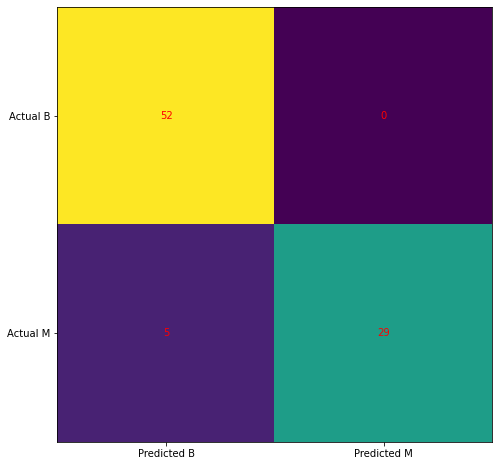

In [36]:
# plot an show of the 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_f)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted B', 'Predicted M'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual B', 'Actual M'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_f[i, j], ha='center', va='center', color='red')
plt.show()

Le résultat de l'accuracy (94%) est conforme avec la moyenne (97.3%) et l'écart type (+-2.6% ) du score donnée par la cross validation

## Conclusion et Perspectives

Dans ce brief, on a choisit de mettre le point sur la démarche de sélection du modèle (l'algorithme + le sclaing+ feature sréduction) à entrainer. Notre choix a été valider par l'imbrication de deux cross validation : une extériure qui gère l'aléatoire de choix de train set et test set, la seconde est intérieure à la grid-search qui sert à la sélection des paramètres de notre modèle. Des améliorations à ce processus sera investiguée prochainement en examinant la ROC Curve.